In [20]:
url = 'https://appstoreconnect.apple.com/apps/1547343625/testflight/testers'
from bs4 import BeautifulSoup
import requests
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
soup.select('div')

[<div id="pageWrapper" ng-show="wrapper.locReady">
 <div id="header">
 <itc-header components="itcHeaderComponents" logo="itcHeaderLogo"></itc-header>
 <div id="developer-header-text" ng-bind-html="wrapper.devHeaderWelcome" ng-show="wrapper.showDevHeaderWelcome"></div>
 </div>
 <div class="flexcol" id="view-wrapper" ui-view=""></div>
 <footer class="footer" id="footer" ng-if="includeDevFooter">
 <div class="footer-content">
 <section class="footer-mini">
 <div class="footer-mini-shop footer-mini-news" ng-bind-html="'ITC.Developer.Login.Footer.NewsText' | l10n"></div>
 <div class="footer-mini-legal">
 <div class="footer-mini-legal-copyright" ng-bind-html="(wrapper.footerConfig.text.copyright + ' ' + wrapper.footerConfig.text.year + ' ' + wrapper.footerConfig.text.rights)"></div>
 <div class="footer-mini-legal-links">
 <a class="footer-mini-legal-link" href="{{ link.url }}" ng-bind-html="link.text" ng-repeat="link in wrapper.footerConfig.links" target="_blank"></a>
 </div>
 </div>
 </sec

In [7]:
cleaner = [l for l in testers.split('\n') if l != ''] 
cleaner

['Public link',
 'Anonymous',
 'Installed 1.4.01 (1)',
 'Feb 25, 2021',
 '3',
 'vulture100@aol.com',
 'Ed Camson',
 'Installed 1.4.01 (1)',
 'Feb 25, 2021',
 '118',
 '2',
 'ncamson@nd.edu',
 'Nick Camson',
 'Installed 1.4.01 (1)',
 'Feb 25, 2021',
 '298',
 '2',
 'Public link',
 'Anonymous',
 'Installed 1.4.01 (1)',
 'Feb 26, 2021',
 '6',
 '1',
 'christianjcarucci@gmail.com',
 'Christian Carucci',
 'Installed 1.4.01 (1)',
 'Feb 25, 2021',
 '16',
 'jruss100@gmail.com',
 'Joe Russick',
 'Installed 1.4.01 (1)',
 'Feb 25, 2021',
 '28',
 '1',
 'Public link',
 'Anonymous',
 'Installed 1.4.01 (1)',
 'Feb 25, 2021',
 '157',
 '2',
 'Public link',
 'Anonymous',
 'Installed 1.4.01 (1)',
 'Feb 27, 2021',
 '80',
 '1',
 'Public link',
 'Anonymous',
 'Installed 1.4.01 (1)',
 'Feb 25, 2021',
 '33',
 'Public link',
 'Anonymous',
 'Installed 1.4.01 (1)',
 'Feb 26, 2021',
 '26',
 '1',
 'Public link',
 'Anonymous',
 'Installed 1.4.01 (1)',
 'Feb 25, 2021',
 '19',
 '1',
 'Public link',
 'Anonymous',
 'Insta

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'pandas'

In [2]:
df = pd.read_csv('batch.csv')

NameError: name 'pd' is not defined

In [ ]:
df.tail()

In [3]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.describe()

In [4]:
df['from_address'].value_counts().head(10)
# create graph with adjacency matrix

NameError: name 'df' is not defined

In [ ]:
df[df.from_address == '0x4e57529d3630b4ad415bdedda508e40e4c632baf']

In [5]:
### Pre-processing

### drop nonce, unnamed, block_hash, block_number, transaction_index, hash
### value: price in ether = value / 10^18 also convert to double for value, gas(10^9), and gas_price(10^9)
### gas: total cost ethereum network charged to consume this transaction
### gas_price: price in wei - smallest amount of ether you can have, can vary based on number of miners in network
### input: payload of the transaction - avoid for now
### block_timestamp: moment the transaction was completed - unix timestamp (number of seconds elapsed since Jan 1970)
### total cost of transaction: gas * gas_price
### time stamp: substract min from all to normalize
### mean and standard deviation
### use etherscan.io and BigQuery
### standardize and normalize data - last step, linear svm, radial activation function

In [6]:
df.drop(['nonce', 'hash', 'transaction_index', 'block_hash', 'block_number', 'Unnamed: 0'], axis=1, inplace=True)

NameError: name 'df' is not defined

In [ ]:
df = df.astype({'value': float, 'from_address': str, 'to_address': str})
df = df.astype({'value': int})

In [11]:
df['gas'] = df['gas'] / 10**9
df['gas_price'] = df['gas_price'] / 10**9
df['total_cost'] = df['gas'] * df['gas_price']
df['block_timestamp'] = df['block_timestamp'] - df['block_timestamp'].min()
df['time'] = df['block_timestamp']
df.drop('block_timestamp', axis=1, inplace=True)

In [12]:
# Webscraping
import requests
import cfscrape
from bs4 import BeautifulSoup
def getEtherScanInfo(address):
    scr =  cfscrape.create_scraper()
    page = scr.get(f'https://etherscan.io/address/{address}')
    soup = BeautifulSoup(page.text, 'html.parser')
    # Return account label
    label = soup.select_one('.h-100 .u-label')
    if label is not None:
        label = label.text.strip()
    return label

In [13]:
# extract features for each account
a=df.groupby(['from_address']).agg({
    'value': ['count','min','max','mean','std'],
   'time': ['min','max','mean','std']
})
a.columns = ['in_count', 'in_min', 'in_max', 'in_mean', 'in_std', 
             'in_time_min', 'in_time_max', 'in_time_mean', 'in_time_std'
            ]
a.index.name = 'address'
b=df.groupby(['to_address']).agg({
     'value': ['count','min','max','mean','std'],
   'time': ['min','max','mean','std']
})
b.columns = ['out_count', 'out_min', 'out_max', 'out_mean', 'out_std', 
             'out_time_min', 'out_time_max', 'out_time_mean', 'out_time_std'
            ]
b.index.name = 'address'

features = a.join(b, on='address',how='outer')
features.in_count = features.in_count.astype(float)
features.out_count = features.out_count.astype(float)

# fill in null values
# empty values receive a small, negative value (not the same as 0)
features = features.fillna(-1e-18)

In [14]:
getEtherScanInfo("0xbCEaA0040764009fdCFf407e82Ad1f06465fd2C4")

'Bancor Hacker'

In [15]:
features.head()

,in_count,in_min,in_max,in_mean,in_std,in_time_min,in_time_max,in_time_mean,in_time_std,out_count,out_min,out_max,out_mean,out_std,out_time_min,out_time_max,out_time_mean,out_time_std
address,,,,,,,,,,,,,,,,,,
0x00000000c0293c8ca34dac9bcc0f953532d34e4d,5652.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,47510.0,2678198.0,2.626812e+06,8.979184e+04,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18
0x0000001694dc0cde49385b318e9aa2fc2d0447de,1.0,5.500000e+18,5.500000e+18,5.500000e+18,-1.000000e-18,2636998.0,2636998.0,2.636998e+06,-1.000000e-18,1.000000e+00,-9.223372e+18,-9.223372e+18,-9.223372e+18,-1.000000e-18,2.588431e+06,2.588431e+06,2.588431e+06,-1.000000e-18
0x0000004e4f4d35154f12386b64ca2449b8724607,32.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,363545.0,2674753.0,2.552893e+06,4.005899e+05,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18
0x0000009f3b04725d48be55edefe15e139912ae42,1.0,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e-18,2632158.0,2632158.0,2.632158e+06,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18
0x000000f54395c554346bfd24e6a1ccd90b881a4e,105.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2572176.0,2674791.0,2.617243e+06,3.483429e+04,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18,-1.000000e-18


In [16]:
# one class svm -> knn clustering -> multi-class svm (use labels) -> random forests -> neural networks
# show correlation between supervised approach vs unsupervised approach

In [17]:
hackers = pd.read_csv('accounts.csv')

In [18]:
hackers = hackers.astype({'Address': str})
hackers = list(hackers['Address'])

In [19]:
features['fraud'] = pd.Series()
for idx, row in features.iterrows():
    if str(idx) in hackers: 
        row['fraud'] = 1
    else:
        row['fraud'] = 0

In [20]:
features['fraud'].describe()

count    239227.000000
mean          0.000100
std           0.010016
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: fraud, dtype: float64

In [21]:
len(features[features['fraud'] == 1])

24

In [22]:
phishers = features[features['fraud'] == 1]
clean = features[features['fraud'] == 0][:27]

In [23]:
df = pd.concat([phishers,clean])

In [24]:
X = df.drop('fraud', axis=1)
y = df['fraud']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### One Class Support Vector Machine

In [26]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)

In [27]:
pred = svm.fit_predict(X)
scores = svm.score_samples(X)
print(scores)

[0.03319533 0.033125   0.03315923 0.03315923 0.03315923 0.03319533
 0.03319533 0.03319533 0.03319533 0.03320309 0.03320309 0.03320309
 0.03320309 0.03332602 0.03332602 0.033125   0.033125   0.
 0.033125   0.033125   0.033125   0.033125   0.033125   0.033125
 0.03409544 0.03332602 0.03332602 0.033125   0.03315923 0.03315923
 0.03319533 0.033589   0.03319533 0.03319555 0.03320309 0.033125
 0.03320309 0.033125   0.033125   0.03367416 0.033125   0.03320309
 0.03332602 0.03332602 0.03315923 0.033125   0.033125   0.03319533
 0.03320309 0.03367416 0.03332602]


### Random Forest Classifier

In [28]:
rf = RandomForestClassifier(max_depth=2, random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.8823529411764706

### K-Nearest Neighbors

In [29]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.8235294117647058

### Multiclass SVM

In [30]:
multi_svm = OneVsOneClassifier(LinearSVC(random_state=0))
multi_svm.fit(X_train,y_train)
multi_svm.score(X_test,y_test)

0.5882352941176471

### Neural Network

In [31]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,),(12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
             ]
        }
       ]

In [32]:
clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                           scoring='accuracy')
clf.fit(X,y)


print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'activation': 'logistic', 'hidden_layer_sizes': (15,), 'solver': 'sgd'}


In [33]:
net = MLPClassifier(activation='logistic', solver='sgd', hidden_layer_sizes=(18,), random_state=42)
net.fit(X_train,y_train)
net.score(X_test, y_test)

0.8235294117647058

### Adding more data entries

In [34]:
clean = features[features['fraud'] == 0][:1000]
df = pd.concat([phishers,clean])
X = df.drop('fraud', axis=1)
y = df['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [90]:
# precision, recall, and f1 score
import numpy as np
rf = RandomForestClassifier(max_depth=2, class_weight={0:1024/1000, 1:1024/24})
rf.fit(X_train, y_train)
rf.score(X_test,y_test)
pred = rf.predict(X_test)
from sklearn import metrics
# testing score
f1 = metrics.f1_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
false = np.count_nonzero(y_test)
print('F1 score: ', f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('False Negatives: ', false)
# training score
# score_train = metrics.f1_score(y_train, pred_train, pos_label=list(set(y_train)))

F1 score:  0.19354838709677416
Precision:  0.125
Recall:  0.42857142857142855
False Negatives:  7


In [116]:
ref = rf.feature_importances_
h = sorted(rf.feature_importances_)
h

[0.0,
 0.0,
 0.0,
 4.055653677282673e-05,
 0.0018058259549532368,
 0.007402729565816282,
 0.017651798309392282,
 0.02025897111424661,
 0.022732232520465696,
 0.03040535370235472,
 0.03835574076223715,
 0.049225863607564146,
 0.07049323671242204,
 0.07816600599406993,
 0.12699891808400338,
 0.14373579208614048,
 0.17892265554458445,
 0.2138043195049768]

In [109]:
df.columns

Index(['in_count', 'in_min', 'in_max', 'in_mean', 'in_std', 'in_time_min',
       'in_time_max', 'in_time_mean', 'in_time_std', 'out_count', 'out_min',
       'out_max', 'out_mean', 'out_std', 'out_time_min', 'out_time_max',
       'out_time_mean', 'out_time_std', 'fraud'],
      dtype='object')

In [105]:
len(y_test[(y_test==1)&(pred==0)])

4

In [107]:
313/338

0.9260355029585798

In [84]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

pred = rf.predict(X_test)
from sklearn import metrics
# testing score
f1 = metrics.f1_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
false = np.count_nonzero(y_test)
print('F1 score: ', f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('False: ', false)

F1 score:  0.25
Precision:  1.0
Recall:  0.14285714285714285
False:  7


In [86]:
multi_svm = OneVsOneClassifier(LinearSVC())
multi_svm.fit(X_train,y_train)
print(multi_svm.score(X_test,y_test))

pred = rf.predict(X_test)
from sklearn import metrics
# testing score
f1 = metrics.f1_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
false = np.count_nonzero(y_test)
print('F1 score: ', f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('False: ', false)

0.8698224852071006
F1 score:  0.25
Precision:  1.0
Recall:  0.14285714285714285
False:  7


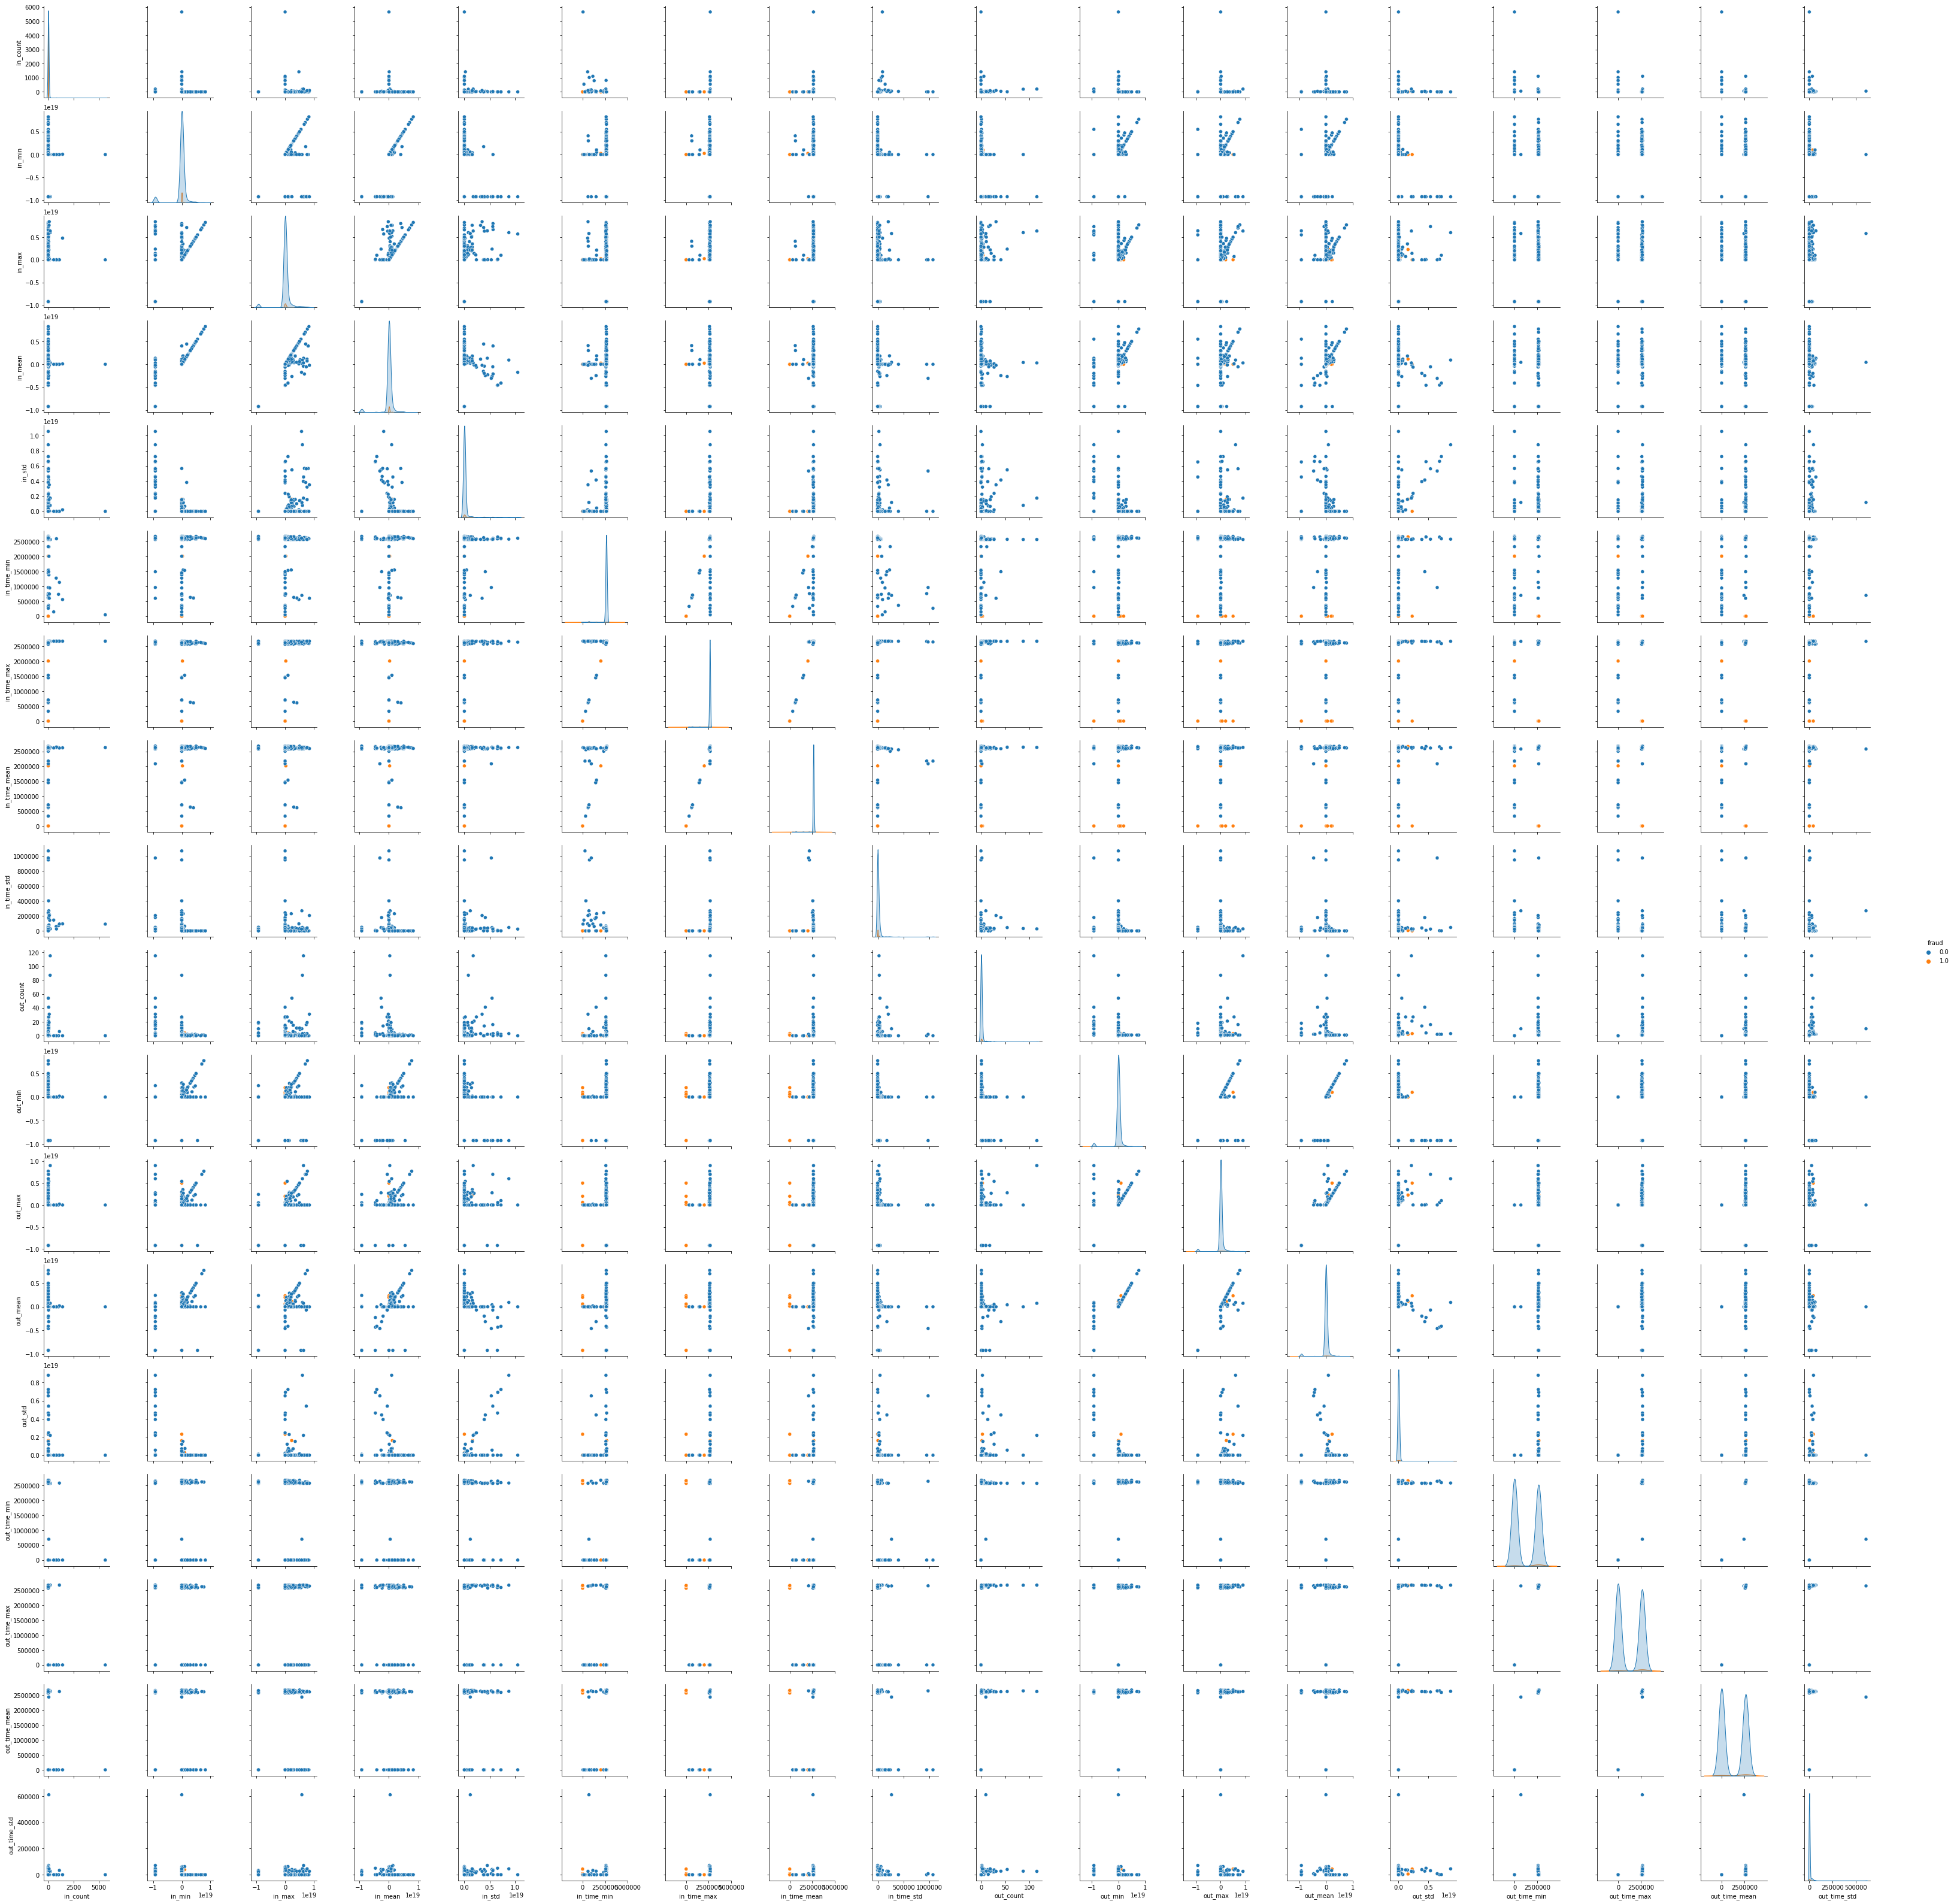

In [38]:
# tsne, analyze histograms to figure out which features will help, larger dataset, manual classifier
sns.pairplot(df, hue='fraud')

In [39]:
df = df.astype({'fraud': int})

In [88]:
len(df[df['fraud'] == 1])

24

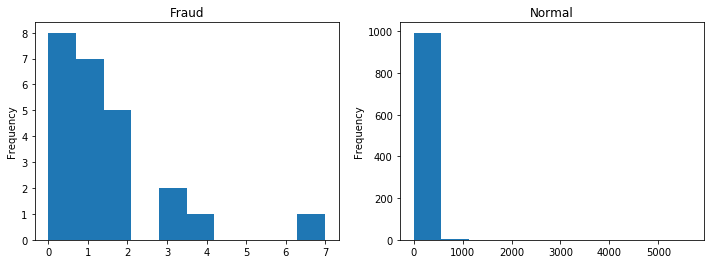

In [40]:
fraud_graph = df[df['fraud'] == 1]['in_count']
normal_graph = df[df['fraud'] == 0]['in_count']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

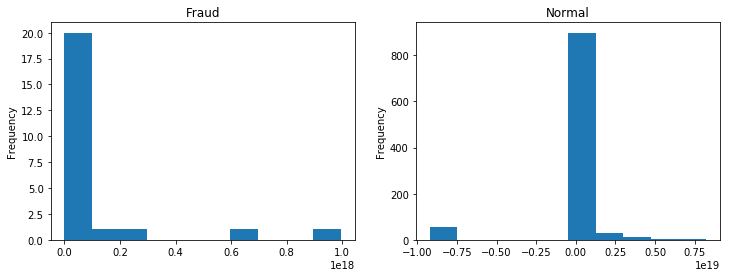

In [41]:
fraud_graph = df[df['fraud'] == 1]['in_min']
normal_graph = df[df['fraud'] == 0]['in_min']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

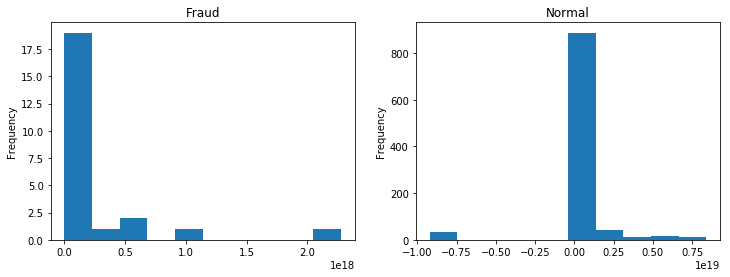

In [42]:
fraud_graph = df[df['fraud'] == 1]['in_max']
normal_graph = df[df['fraud'] == 0]['in_max']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

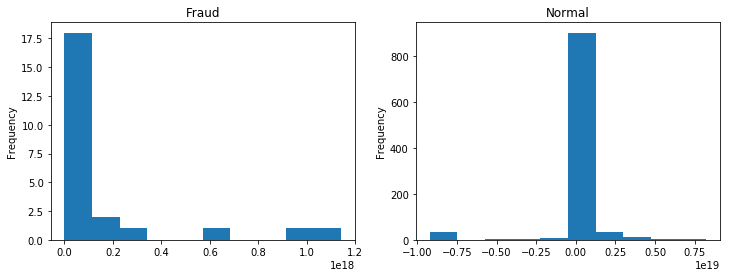

In [43]:
fraud_graph = df[df['fraud'] == 1]['in_mean']
normal_graph = df[df['fraud'] == 0]['in_mean']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

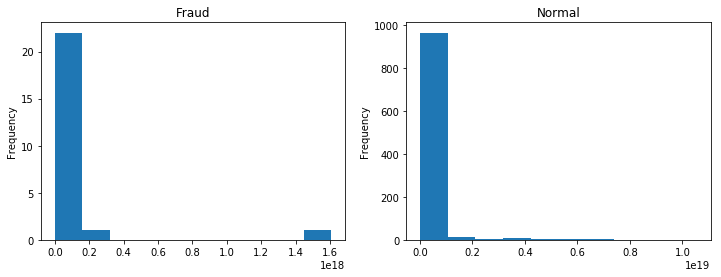

In [44]:
fraud_graph = df[df['fraud'] == 1]['in_std']
normal_graph = df[df['fraud'] == 0]['in_std']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

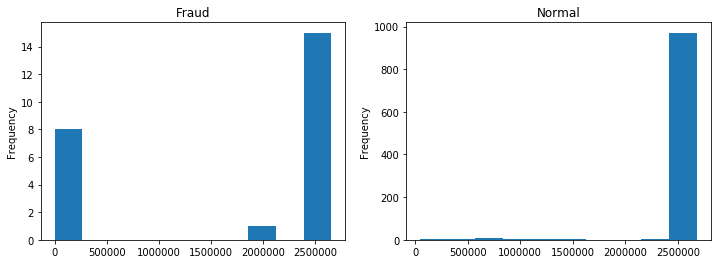

In [45]:
fraud_graph = df[df['fraud'] == 1]['in_time_min']
normal_graph = df[df['fraud'] == 0]['in_time_min']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

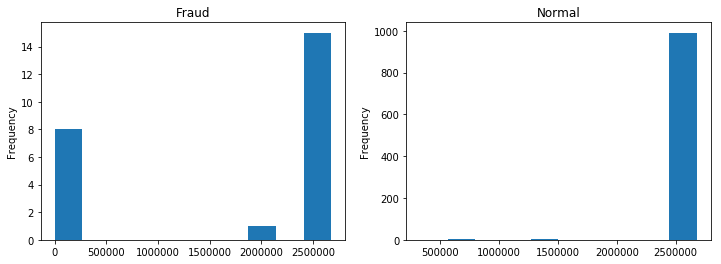

In [46]:
fraud_graph = df[df['fraud'] == 1]['in_time_max']
normal_graph = df[df['fraud'] == 0]['in_time_max']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

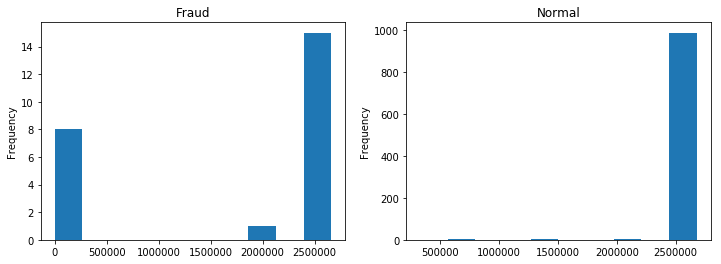

In [47]:
fraud_graph = df[df['fraud'] == 1]['in_time_mean']
normal_graph = df[df['fraud'] == 0]['in_time_mean']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

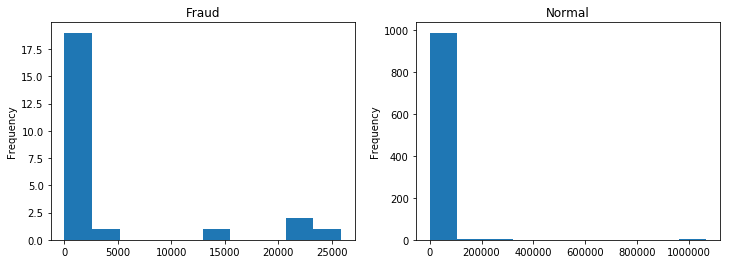

In [48]:
fraud_graph = df[df['fraud'] == 1]['in_time_std']
normal_graph = df[df['fraud'] == 0]['in_time_std']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

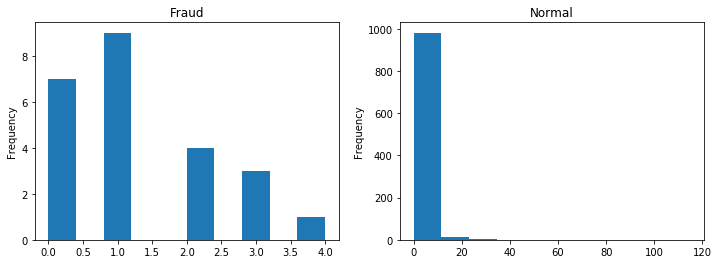

In [49]:
fraud_graph = df[df['fraud'] == 1]['out_count']
normal_graph = df[df['fraud'] == 0]['out_count']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

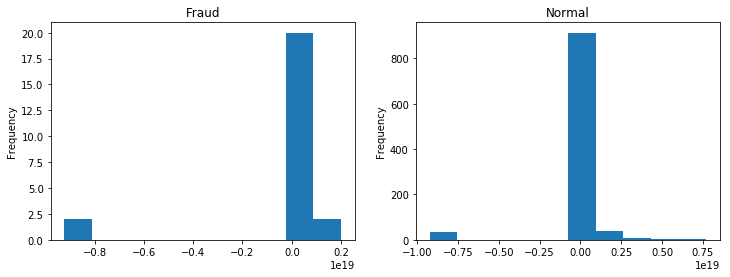

In [50]:
fraud_graph = df[df['fraud'] == 1]['out_min']
normal_graph = df[df['fraud'] == 0]['out_min']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

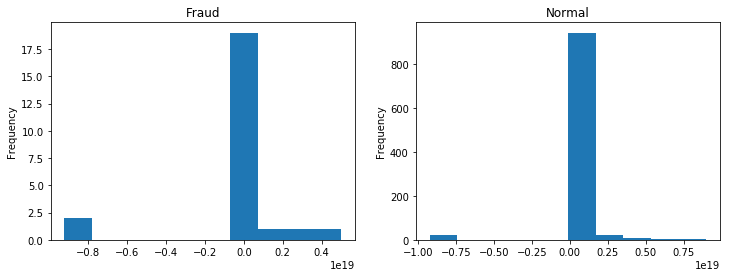

In [51]:
fraud_graph = df[df['fraud'] == 1]['out_max']
normal_graph = df[df['fraud'] == 0]['out_max']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

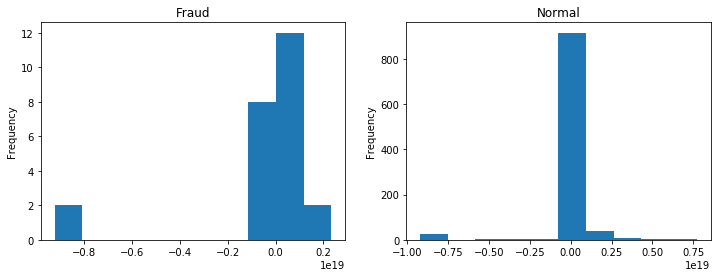

In [52]:
fraud_graph = df[df['fraud'] == 1]['out_mean']
normal_graph = df[df['fraud'] == 0]['out_mean']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

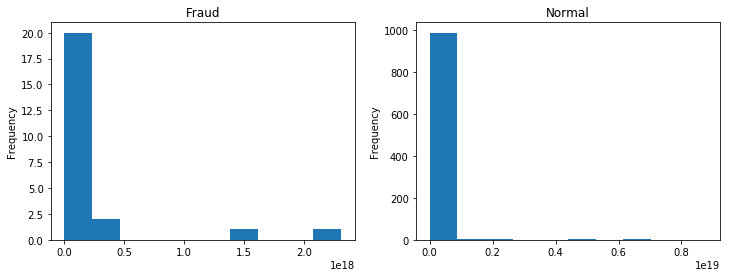

In [53]:
fraud_graph = df[df['fraud'] == 1]['out_std']
normal_graph = df[df['fraud'] == 0]['out_std']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

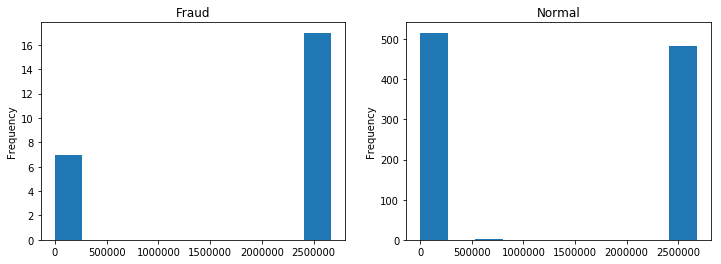

In [54]:
fraud_graph = df[df['fraud'] == 1]['out_time_min']
normal_graph = df[df['fraud'] == 0]['out_time_min']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

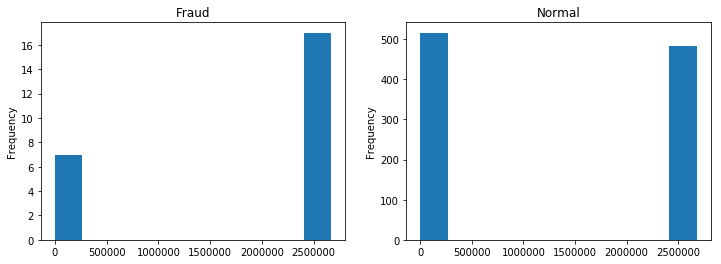

In [55]:
fraud_graph = df[df['fraud'] == 1]['out_time_max']
normal_graph = df[df['fraud'] == 0]['out_time_max']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

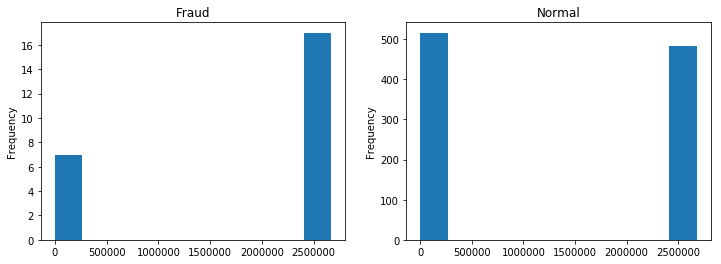

In [56]:
fraud_graph = df[df['fraud'] == 1]['out_time_mean']
normal_graph = df[df['fraud'] == 0]['out_time_mean']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

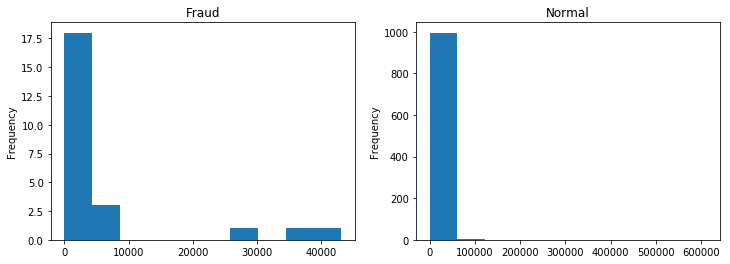

In [57]:
fraud_graph = df[df['fraud'] == 1]['out_time_std']
normal_graph = df[df['fraud'] == 0]['out_time_std']

fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
x_axis = [-2,-1,0,1,2,3,4,5,6,7,8,9]
for i, y_ax in enumerate([fraud_graph,normal_graph]):
    pd.Series(y_ax).plot(kind='hist', ax=axs[i])
    axs[i].set_title('{}'.format('Fraud' if i == 0 else 'Normal'))

In [58]:
normal_graph.describe()
normal_graph[normal_graph > 0]

address
0x000279d97dd754445aae50fa435d17c977f3aef9     2099.444053
0x000286ff0cd78a21ed5ea86899241b09e194ba66    18902.378475
0x0003951907419e749223df0d552aabb5d2ed2482    18876.673513
0x0004eef7c483f227b3f5f75d28f3ef8c85d85319    26915.157021
0x0005d883fc1dc3e91b8905543063d47a43708182    27944.097689
0x000bcb24f068d17025aba67ac347aa184ed93a61      521.328431
0x000da723fbe6922259c709ab54d44da921980ff4    17618.979667
0x000e20a2eefa97815f3f5057fcd8920acf1ae0de    25232.047794
0x000e4862dd7387d5aaea58089a2c83b0838d90cb    39982.209229
0x000e78191390f04aa63db4c9ebe0867524c0d8f1    20156.726015
0x00110639d18a72fef6861bef6977c15d86289980       21.213203
0x00129a6cd3a9882106123affb4bd7f617cda3ea8    30816.932480
0x0017c97fa0f47a8ba4a836fe6926bb75a55c015f     1542.906997
0x0019c158ccb10bd0e7a9da515c21d4d7ef8f5221      421.435642
0x001a45c6aa56522143633fbd91be10ce9f35bf66      396.686904
0x001addeb05d5607dd44a0011a47d806e0456efe2    33645.150852
0x001d395a144cc31a6cf0d00372a65b79e64463b2     3

In [59]:
fraud_graph.value_counts()
fraud_graph.describe()
fraud_graph[fraud_graph > 0]

address
0x70d2aa8459fb92b862e7806ef474a9ecaae6c176    28634.289104
0x7c9001c50ea57c1b2ec1e3e63cf04c297534bfc1     4911.563702
0x9735ba8d7374649d188afadea5019e12d2587e00    38529.979488
0xb7686c343be859d7875f8d6bb7c228858e229b8d      599.626550
0xcf88e517342aa1b0e17dee16d141e5093e4c5de5     1861.199971
0xdb9a0ef90ff67b9d0ae480565f7d576f0fd52431     8302.847825
0x00dbc5d9f5c3cfb4f9f889ad0bf20650a21c6c39    43138.896536
0x49029d2ded6cbd6a31078cc45e7f58fa79fae02a     7355.132720
Name: out_time_std, dtype: float64

In [60]:
# manual classifier

# fraud if out_time_std > 20000
# fraud if out_std > 1.0
# normal if in_time_std > 30000
# fraud if in_std > 1.0
# fraud if in_mean > .8
# fraud if in_min > .8
# fraud if in_max > 1.0

In [61]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
def plot_dist(df, col, title):
    maxscore = int(df[col].max() * 1.02)
    binwidth = int(maxscore/(maxscore * 0.4))
    tmpdf = df[df[col]>=0]
    sns.displot(tmpdf, x=col, hue='fraud', legend=True, 
        bins=30, stat='probability', common_norm=False,)
    fte = len(df[df[col]<0])/len(df)
    xpos = 0.6*tmpdf[col].max()
    plt.text(xpos, 0.95,f'FTE: {fte:0.2f}', fontsize=9)
    plt.title(title)
    # plt.legend()
def plot_roc(df, title):
    tmpdf = df[df.score>=0]
    tmpdf.loc[tmpdf.score==0,'score']=1e-9
    tmpdf['proba'] = tmpdf.score/tmpdf.score.max()
    fpr, tpr, thr = roc_curve(
        tmpdf.isgenuine,
        tmpdf.proba
    )
    roc_auc = auc(fpr, tpr)
    # print('Plotting results...')
    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

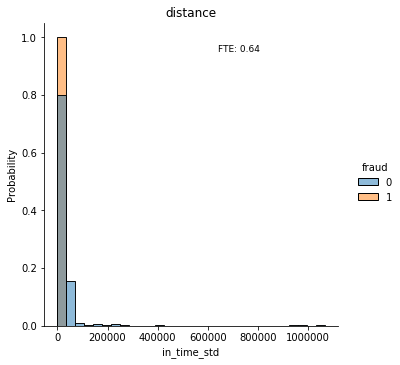

In [62]:
plot_dist(df, 'in_time_std', 'distance')

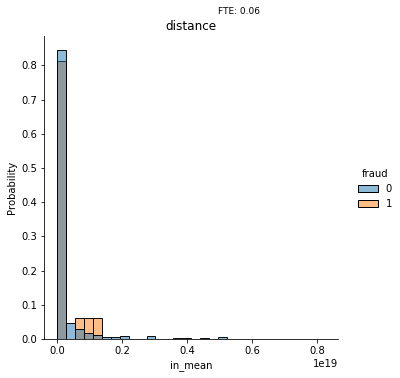

In [70]:
plot_dist(df, 'in_mean', 'distance')